<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%ED%95%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

전에 농어 무게를 예측하는 K-최근접 알고리즘을 사용하여 회귀모델을 사용해본 결과,

정확한 예측이 어려울 수 있다는 결론이 생김(원본데이터의 갯수 부족)

예를 들어, 길이가 50cm인 농어가 입고되었을 경우 회귀는?(한계점이 발생함)

In [1]:
import numpy as np
# 농어의 샘플자료 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [2]:
# 사이킷런을 이용하여 훈련세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)    # train_test_split 사용법은 url 참고 / https://blog.naver.com/siniphia/221396370872

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)    # 이웃의 갯수를 3으로 설정
knr.fit(train_input, train_target)
print(knr.predict([[50]]))    # 50cm 농어의 무게는 1,033g으로 예측

[1033.33333333]


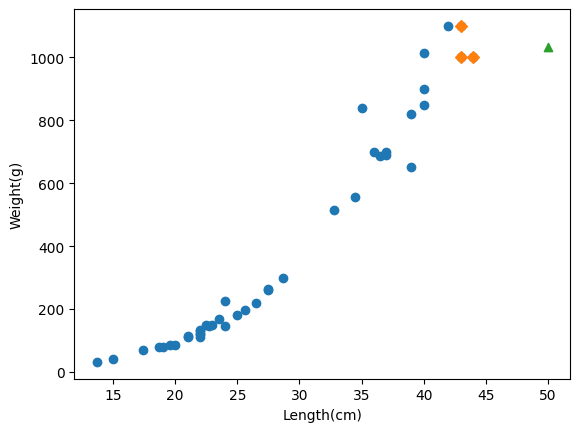

In [5]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])    # 50cm 짜리 농어의 이웃을 구함

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033, marker = '^')    # 50cm 짜리 농어 데이터
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [6]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [7]:
print(knr.predict([[100]]))

[1033.33333333]


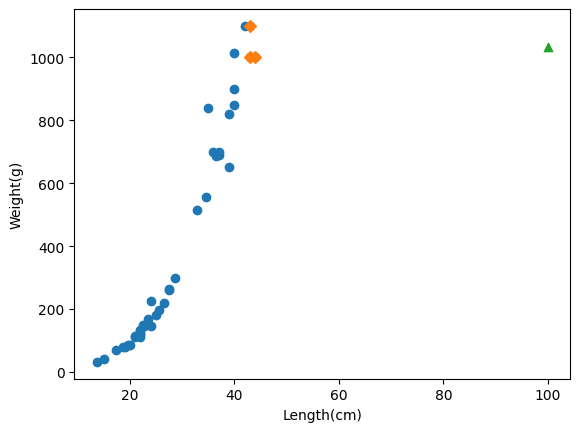

In [9]:
# 결론 : 기본데이터 부족으로 한계가 생김
distances, indexes = knr.kneighbors([[100]])    # 100cm짜리 농어의 이웃을 구함

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker = '^')    # 100cm짜리 농어 데이터
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [10]:
# k-최근접 이웃 알고리즘의 대안 -> 선형회귀
# 선형회귀(linear) : 비교적 간단하고 성능이 뛰어남
# 선형이라는 말에서 짐작할 수 있듯이 직선을 학습하는 알고리즘
# 가로선 : 무게의 무게를 1개로 인식함
# 역비례선 : 반대로 예측
# 비례선 : 정상적인 차트로 구현

# 사이킷런에서 제공하는 클래스 사용(LinearRegression : 선형회귀용
from sklearn.linear_model import LinearRegression

lr = LinearRegression()    # 선형회귀용 객체 생성 -> 변수에 연결
lr.fit(train_input, train_target)    # 선형회귀용으로 훈련 시작

LinearRegression()

In [11]:
print(lr.predict([[50]]))    # 농어의 무게 기울기 + 절편 / (y(농어의 무게) = a(기울기) * x(농어의 길이) + b(절편 or 가중치))

[1241.83860323]


In [14]:
print(lr.coef_, lr.intercept_)
# lr.coef_ : 계수, lr.intercept_ : 인터셉트
# 기울기 : 종종계수(coefficent), 가중치(weight)

[39.01714496] -709.0186449535477


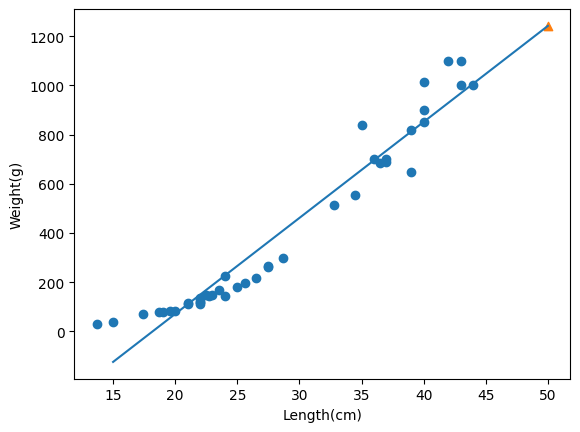

In [16]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])    # 15 ~ 50까지 1차 방정식 그래프
plt.scatter(50, 1241.8, marker = '^')    # 50cm 농어 데이터
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [17]:
# 결론 : 예측은 가능하나 기울기 값이 직선이라 결과값이 너무 직선적으로 나옴

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 훈련세트 > 테스트세트 이나, 차이가 많이 나므로 과소적합임(차이는 5% 전후가 적당함...)

0.939846333997604
0.8247503123313558


In [18]:
# 다항회귀(Polynomial Regression) : 2차원 방정식의 그래프로 그리려면 길이의 제곱한 항이 훈련세트에 추가되어야함
# 선형회귀의 문제점은 오니쪽 하단에 있는 기준점이 불일치 -> 곡선으로 만들어야 함
train_poly = np.column_stack((train_input ** 2, train_input))
# 제곱한 것과 두 배열을 나란히 붙힘
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [19]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [21]:
lr = LinearRegression()    # 선형회귀 객체 생성
lr.fit(train_poly, train_target)    # 훈련시작
print(lr.predict([[50**2, 50]]))    # 결과 테스트 / 테스트할 때 이 모델의 농어 길이의 제곱과 원래 길이를 함께 넣음

[1573.98423528]


In [22]:
# 농어의 무게 기울기 + 절편 / y(농어의 무게) = a(기울기) * x(농어의 길이) + b(절편 or 가중치)
print(lr.coef_, lr.intercept_)
# 1573.98 = (1.01 * 50**2) + (-21.55 * 50) + 116.05

[  1.01433211 -21.55792498] 116.0502107827827


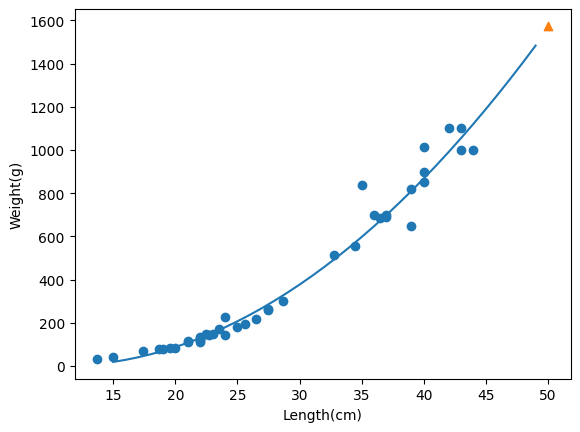

In [23]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05)    # 다항회귀 공식 적용
plt.scatter([50], [1574], marker = '^')    # 50cm 농어 데이터
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [24]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 훈련 < 테스트 이므로 과소적합

# 선형회귀와 다항회귀를 통해 문제를 해결하고자 하였으나, 아직 모델에 과소적합 문제가 남아있음
# 이를 해결하기 위해 조금 더 복잡한 모델을 구성해야하나, 이로인해 너무 복잡해진 경우 모델의 복잡도를 억제하는 방안도 구상해야할 것으로 판단됨.

0.9706807451768623
0.9775935108325122
